In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('telecom_customer_churn_cleaned.csv')
# Display first few rows
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.0,0,381.51,974.81,Stayed,NaN,NaN
1,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
2,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
3,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
4,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.4,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN


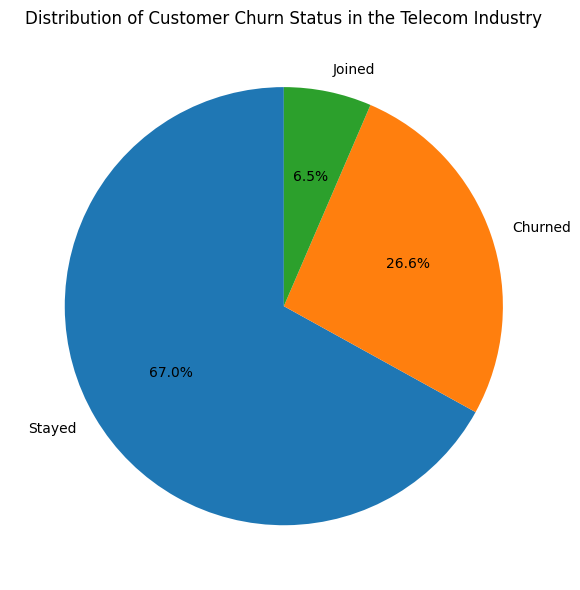

In [14]:
# Block 1: Churn Distribution (Pie Chart)

churn_counts = df['Customer Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Churn Status in the Telecom Industry')
plt.tight_layout()
plt.show()


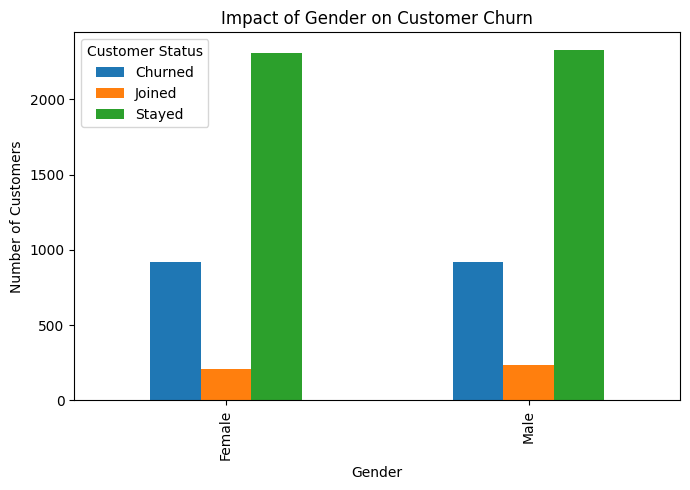

In [15]:
# Block 2: Gender vs Churn

gender_churn = df.groupby(['Gender', 'Customer Status']).size().unstack()

gender_churn.plot(kind='bar', figsize=(7,5))
plt.title('Impact of Gender on Customer Churn')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()



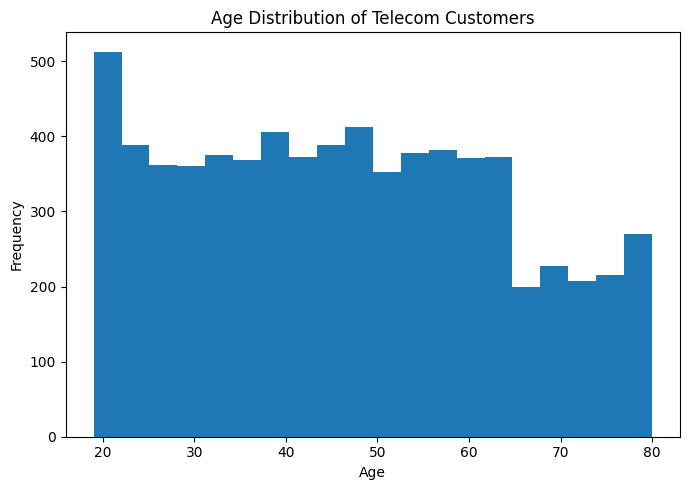

In [16]:
# Block 3: Age Distribution

plt.figure(figsize=(7,5))
plt.hist(df['Age'], bins=20)
plt.title('Age Distribution of Telecom Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<Figure size 700x500 with 0 Axes>

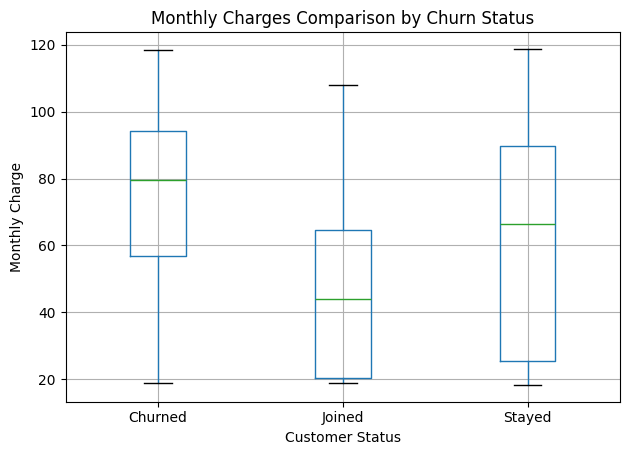

In [17]:
# Block 4: Monthly Charges Comparison: Churned vs Stayed

plt.figure(figsize=(7,5))
df.boxplot(column='Monthly Charge', by='Customer Status')
plt.title('Monthly Charges Comparison by Churn Status')
plt.suptitle('')  # Removes default title
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')
plt.tight_layout()
plt.show()


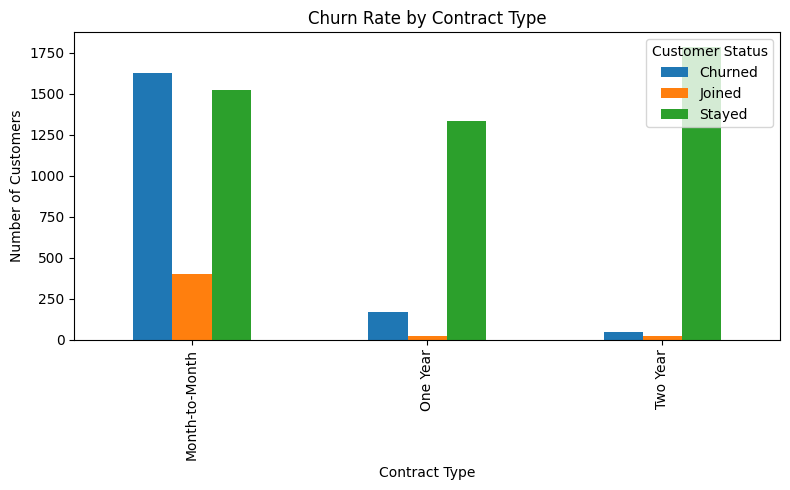

In [18]:
# Block 5: Contract Type vs Churn

contract_churn = df.groupby(['Contract', 'Customer Status']).size().unstack()

contract_churn.plot(kind='bar', figsize=(8,5))
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()


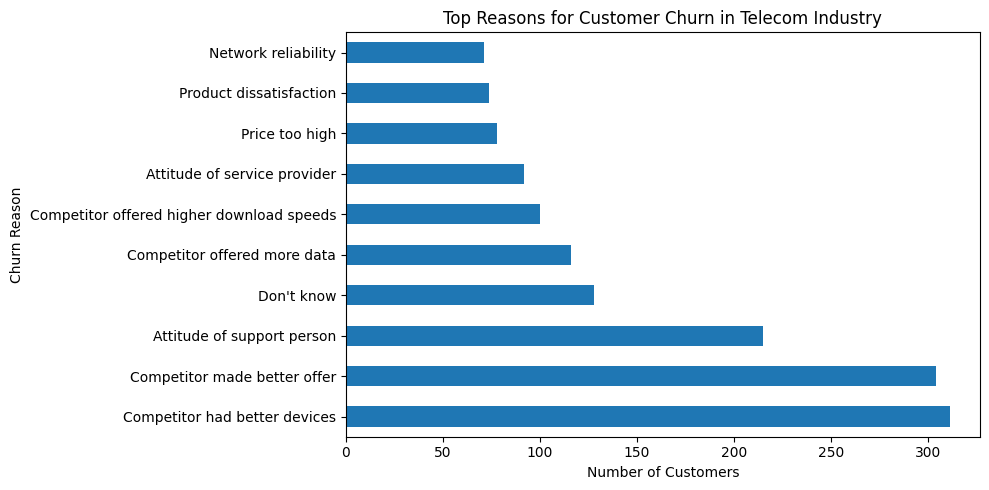

In [19]:
# A1: Top Churn Reasons (Horizontal Bar Chart)

# Filter churned customers only
churned_data = df[df['Customer Status'] == 'Churned']

# Count churn reasons
reason_counts = churned_data['Churn Reason'].value_counts().head(10)

plt.figure(figsize=(10,5))
reason_counts.plot(kind='barh')
plt.title('Top Reasons for Customer Churn in Telecom Industry')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.tight_layout()
plt.show()


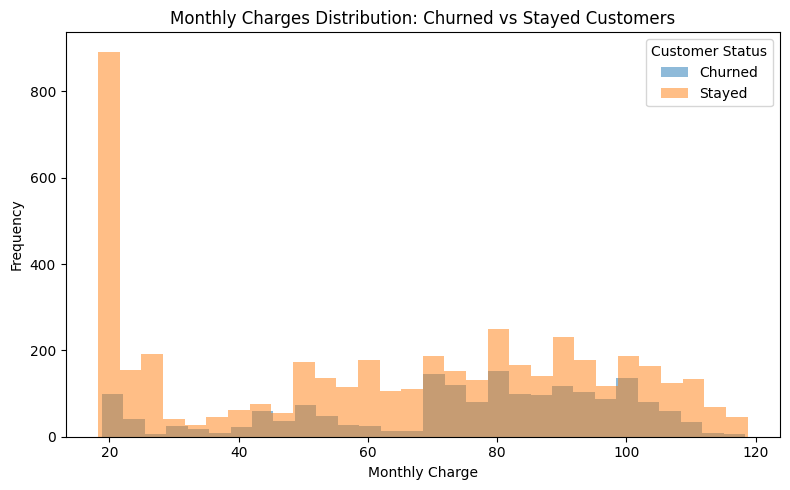

In [33]:
# A2: Monthly Charges Comparison (Churned vs Stayed)

plt.figure(figsize=(8,5))
for status in ['Churned', 'Stayed']:
    subset = df[df['Customer Status'] == status]
    plt.hist(subset['Monthly Charge'], bins=30, alpha=0.5, label=status)

plt.title('Monthly Charges Distribution: Churned vs Stayed Customers')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()



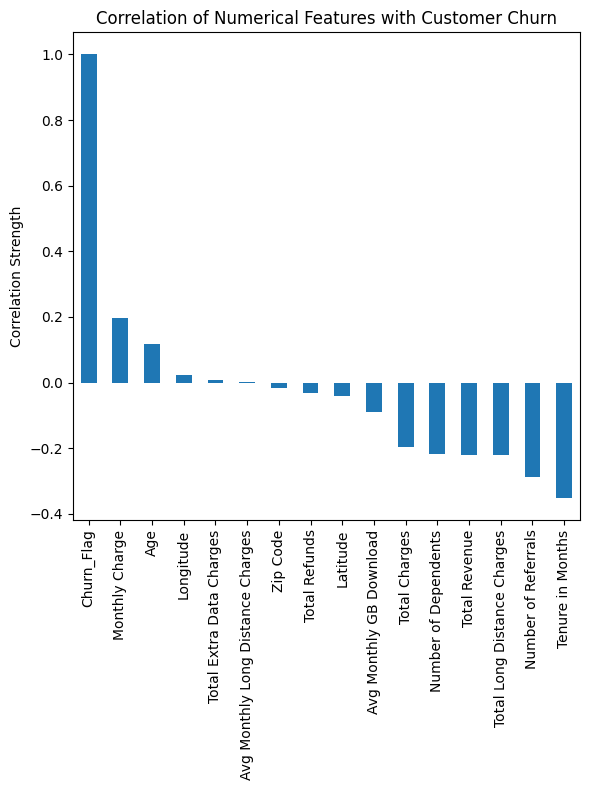